# Checagem de dados

Scripts com exemplos de como fazer o carregamento e divisão dos dados de forma estratificada.
 

In [1]:
# imports

import os
import sys
sys.path.append(os.path.abspath('..'))
from rasterio.coords import BoundingBox

import src.data.preprocess_data as data
#import src.models.unets as unets

import torch

### Definições
Quais tiles e o número de subtiels são definidos a seguir. 

In [2]:
tiles = ['032027']#, '032026'] 
num_subtiles = 6


Divisão do conjunto de treino, validação e teste, em que cada arquivo em data/processed dos tiles correspondentes são associados a um dos conjuntos.

É feita a estratificação baseada nas máscaras, de acordo com o valor de classe escolhida pelo usuário.

Neste exemplo, é feita pelo tipo.



In [3]:

train_files, val_files, test_files = data.train_val_test_stratify(tiles, 
                                                                  num_subtiles,
                                                                    train_size = 0.7, 
                                                                    val_size = 0.15, 
                                                                    stratify_by = 'type')



Loading:  <function yaml_filename at 0x7cdac5beb640>
File already saved, loading it.


In [4]:
train_files, val_files, test_files
len(train_files), len(val_files), len(test_files)

(25, 5, 6)

## Checagem de resultados da estratificação

data.check_stratification imprime o número de pixels de cada classe por divisão de conjunto. 

In [5]:
data.check_stratification(train_files+val_files+test_files, num_subtiles=6, stratify_by='type')

data.check_stratification(train_files, num_subtiles=6, stratify_by='type')
data.check_stratification(val_files, num_subtiles=6, stratify_by='type')
data.check_stratification(test_files, num_subtiles=6, stratify_by='type')


0 103639591 111513600; 4 7084456 111513600; 1 263634 111513600; 2 422487 111513600; 3 103432 111513600; {0: 0.9293896977588384, 4: 0.06352997302571166, 1: 0.0023641421315426995, 2: 0.0037886589617768594, 3: 0.0009275281221303948}
0 75297020 77440000; 4 1841782 77440000; 1 116595 77440000; 2 173789 77440000; 3 10814 77440000; {0: 0.9723272210743802, 4: 0.02378334194214876, 1: 0.0015056172520661157, 2: 0.002244176136363636, 3: 0.00013964359504132232}
0 12487458 15488000; 1 66555 15488000; 4 2830212 15488000; 2 39547 15488000; 3 64228 15488000; {0: 0.8062666580578512, 1: 0.004297197830578512, 4: 0.18273579545454546, 2: 0.0025533961776859505, 3: 0.004146952479338843}
0 15855113 18585600; 1 80484 18585600; 2 209151 18585600; 4 2412462 18585600; 3 28390 18585600; {0: 0.8530858836949036, 1: 0.004330449380165289, 2: 0.01125338972107438, 4: 0.12980275051652893, 3: 0.0015275266873278238}


{0: 0.8530858836949036,
 1: 0.004330449380165289,
 2: 0.01125338972107438,
 4: 0.12980275051652893,
 3: 0.0015275266873278238}

In [6]:
train_files_no_strat, val_files_no_strat, test_files_no_strat = data.train_val_test_stratify(tiles, 
                                                                  num_subtiles,
                                                                    train_size = 0.7, 
                                                                    val_size = 0.15, 
                                                                    stratify_by = '')

Loading:  <function yaml_filename at 0x7cdac5beb640>
File already saved, loading it.


In [7]:
data.check_stratification(train_files_no_strat+val_files_no_strat+test_files_no_strat, num_subtiles=6, stratify_by='')

data.check_stratification(train_files_no_strat, num_subtiles=6, stratify_by='')
data.check_stratification(val_files_no_strat, num_subtiles=6, stratify_by='')
data.check_stratification(test_files_no_strat, num_subtiles=6, stratify_by='')

0 103639591 111513600; 8 1698000 111513600; 9 5386456 111513600; 1 263634 111513600; 3 383398 111513600; 2 39089 111513600; 5 94008 111513600; 4 9424 111513600; {0: 0.9293896977588384, 8: 0.015226842286501377, 9: 0.04830313073921028, 1: 0.0023641421315426995, 3: 0.003438127726124885, 2: 0.0003505312356519743, 5: 0.0008430182506887052, 4: 8.450987144168963e-05}
0 70742692 77440000; 8 1119175 77440000; 9 4892234 77440000; 1 191822 77440000; 3 361647 77440000; 2 32021 77440000; 5 94008 77440000; 4 6401 77440000; {0: 0.9135161673553719, 8: 0.014452156508264462, 9: 0.06317450929752066, 1: 0.0024770402892561982, 3: 0.004670028409090909, 2: 0.00041349431818181817, 5: 0.0012139462809917356, 4: 8.265754132231405e-05}
0 14872621 15488000; 1 44109 15488000; 3 15760 15488000; 8 322357 15488000; 9 229634 15488000; 2 3519 15488000; {0: 0.9602673682851239, 1: 0.002847946797520661, 3: 0.0010175619834710745, 8: 0.02081333935950413, 9: 0.014826575413223141, 2: 0.0002272081611570248}
0 18024278 18585600;

{0: 0.969798015668044,
 1: 0.0014905625860881543,
 2: 0.00019095428719008266,
 3: 0.0003223463326446281,
 8: 0.01379928546831956,
 9: 0.014236182851239669,
 4: 0.0001626528064738292}

## Salvar e carregar

Um arquivo yaml é salvo automaticamente.


In [8]:

train_files, val_files, test_files = data.train_val_test_stratify(tiles, 
                                                                  num_subtiles,
                                                                    train_size = 0.7, 
                                                                    val_size = 0.15, 
                                                                    stratify_by = 'type')


Loading:  <function yaml_filename at 0x7cdac5beb640>
File already saved, loading it.


## Dataset e dataloader

Carregamento de imagens e mascaras, por tipo.

É feita com janelamento com stride de metade do tamanho da imagem.

Adicionalmente, é feito data augmentation. As classes minoritárias que tem 1% ou mais de área da imagem geram 8 cópias contendo as transformacoes "Dihedral Group of Order 8" (ou D₄).

In [9]:
%%time
train_dataset = data.SubtileDataset(train_files, 
                    num_subtiles = num_subtiles, 
                    classes_mode = 'type', 
                    patch_size=256, 
                    stride=128, 
                    data_augmentation = True, # testando 
                    return_imgidx = False,
                    treat_nans='nearest',
                    debug=False)



Doing data augmentation...
Augmented 853 images, of 4900
CPU times: user 12.7 s, sys: 379 ms, total: 13.1 s
Wall time: 13.1 s


In [10]:
train_dataset_2 = data.SubtileDataset(train_files, 
                    num_subtiles = num_subtiles, 
                    classes_mode = 'type', 
                    patch_size=256, 
                    stride=128, 
                    data_augmentation = True, # testando 
                    return_imgidx = False,
                    treat_nans=True,
                    debug=False)


Doing data augmentation...
Augmented 853 images, of 4900


In [ ]:
for data1, data2 in zip(train_dataset, train_dataset_2):
    print(data1[0].min(), data1[0].max())
    print(data2[0].min(), data2[0].max())
    print((data1[0]-data2[0]).abs().sum())
    

tensor(88.) tensor(4617.)
tensor(0.0088) tensor(0.4617)
tensor(1.2099e+09)
tensor(88.) tensor(4617.)
tensor(0.0088) tensor(0.4617)
tensor(1.2099e+09)
tensor(88.) tensor(4617.)
tensor(0.0088) tensor(0.4617)
tensor(1.2099e+09)
tensor(88.) tensor(4617.)
tensor(0.0088) tensor(0.4617)
tensor(1.2099e+09)
tensor(88.) tensor(4617.)
tensor(0.0088) tensor(0.4617)
tensor(1.2099e+09)
tensor(88.) tensor(4617.)
tensor(0.0088) tensor(0.4617)
tensor(1.2099e+09)
tensor(88.) tensor(4617.)
tensor(0.0088) tensor(0.4617)
tensor(1.2099e+09)
tensor(88.) tensor(4617.)
tensor(0.0088) tensor(0.4617)
tensor(1.2099e+09)
tensor(25.) tensor(5113.)
tensor(0.0025) tensor(0.5113)
tensor(1.2227e+09)
tensor(25.) tensor(5113.)
tensor(0.0025) tensor(0.5113)
tensor(1.2227e+09)
tensor(25.) tensor(5113.)
tensor(0.0025) tensor(0.5113)
tensor(1.2227e+09)
tensor(25.) tensor(5113.)
tensor(0.0025) tensor(0.5113)
tensor(1.2227e+09)
tensor(25.) tensor(5113.)
tensor(0.0025) tensor(0.5113)
tensor(1.2227e+09)
tensor(25.) tensor(5113.)

Das 9800 imagens, 1455 delas tiveram mais de 1% de área de classes minoritárias. Essas são readicionadas no dataset em 7 transformações adicionais.

Isso gera, para este conjunto de treino, 1455*7 + 9800 = 19985 imagens.
 

In [ ]:
print(len(train_dataset))
for img, mask in train_dataset:
    print(img.shape)
    print(mask.shape)
    break

10871
debugging
nearest
torch.Size([12, 256, 256])
torch.Size([1, 256, 256])


### Exemplo de imagem

debugging
nearest


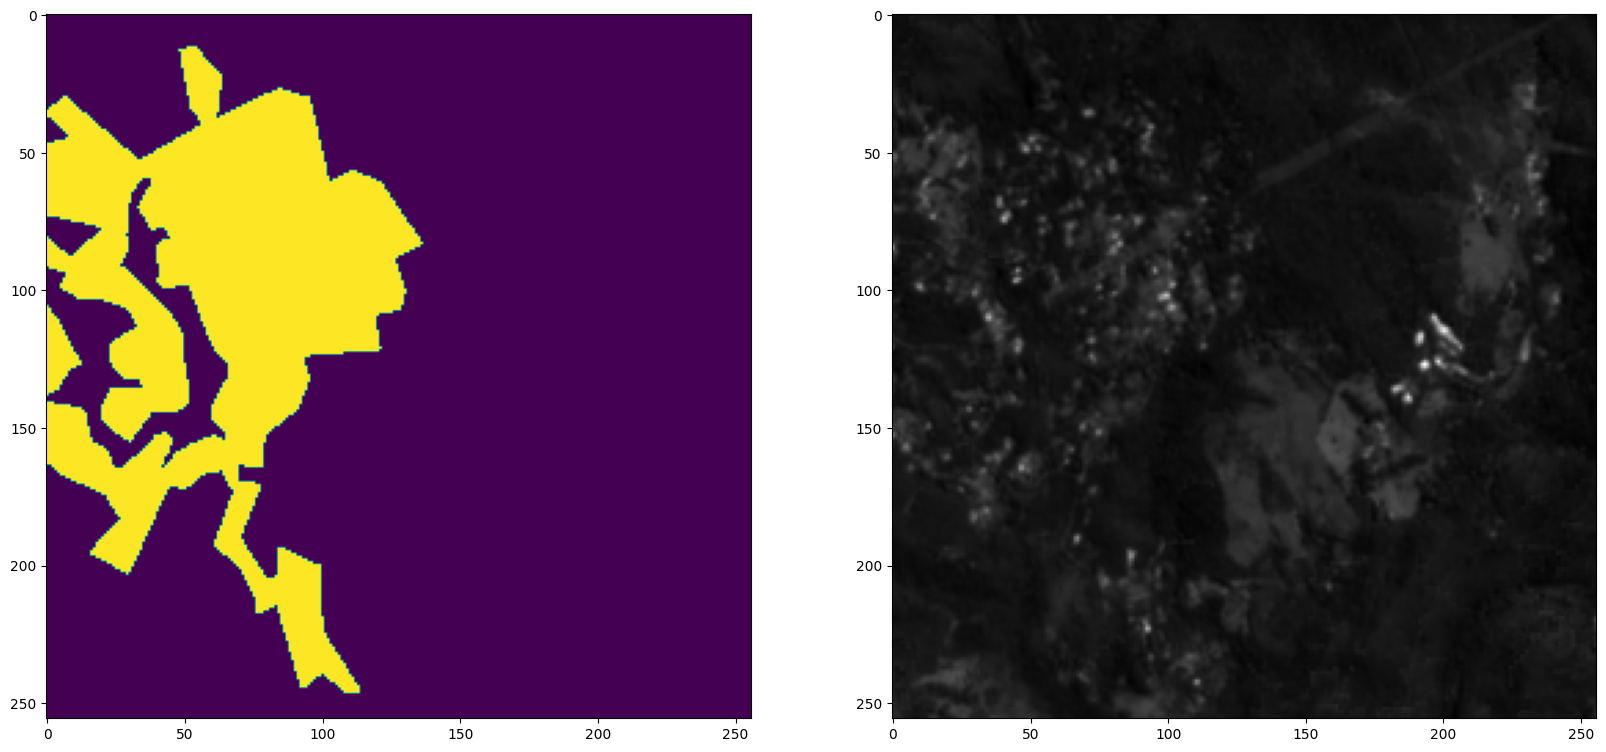

1
debugging
nearest


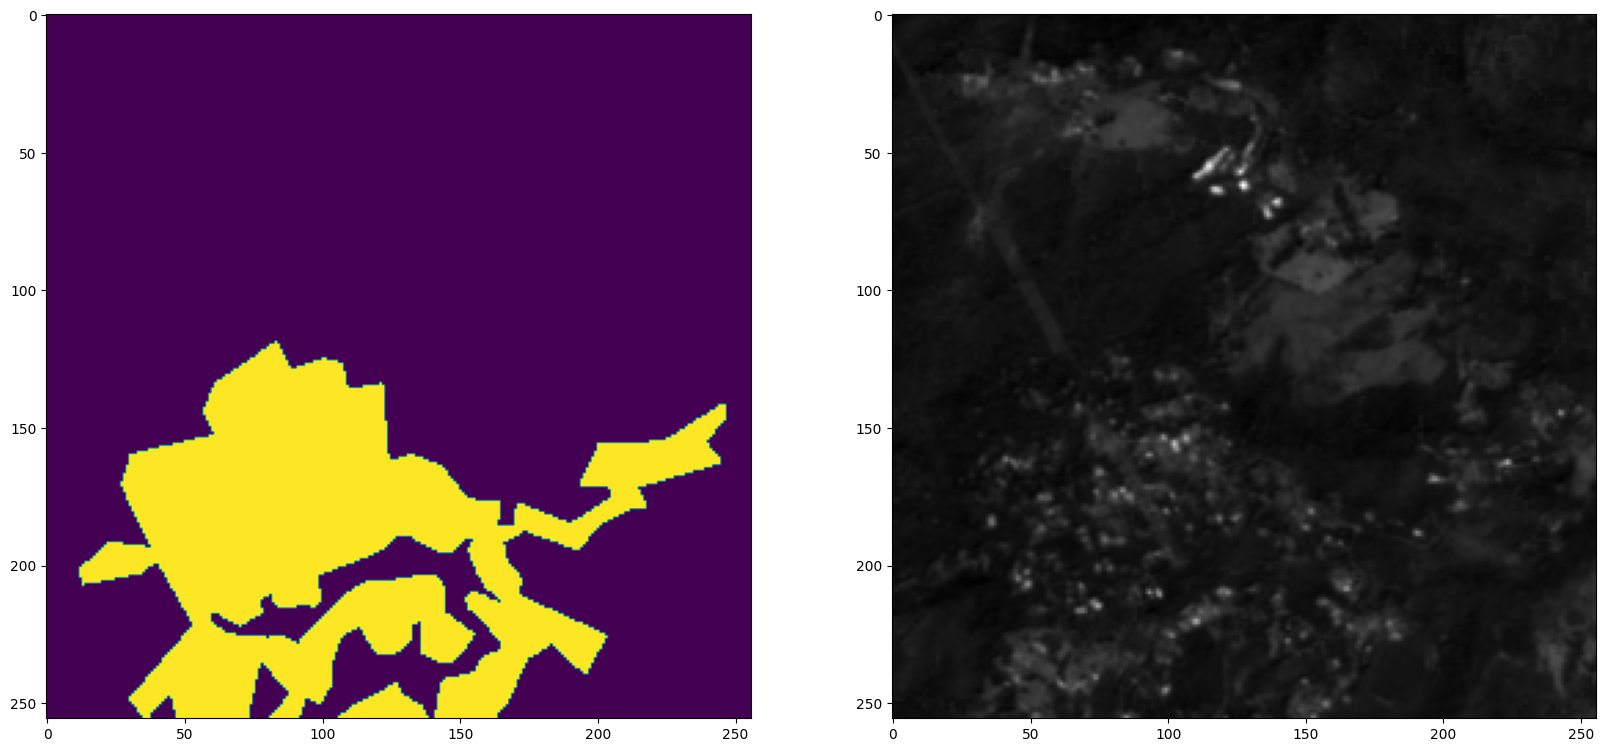

2
debugging
nearest


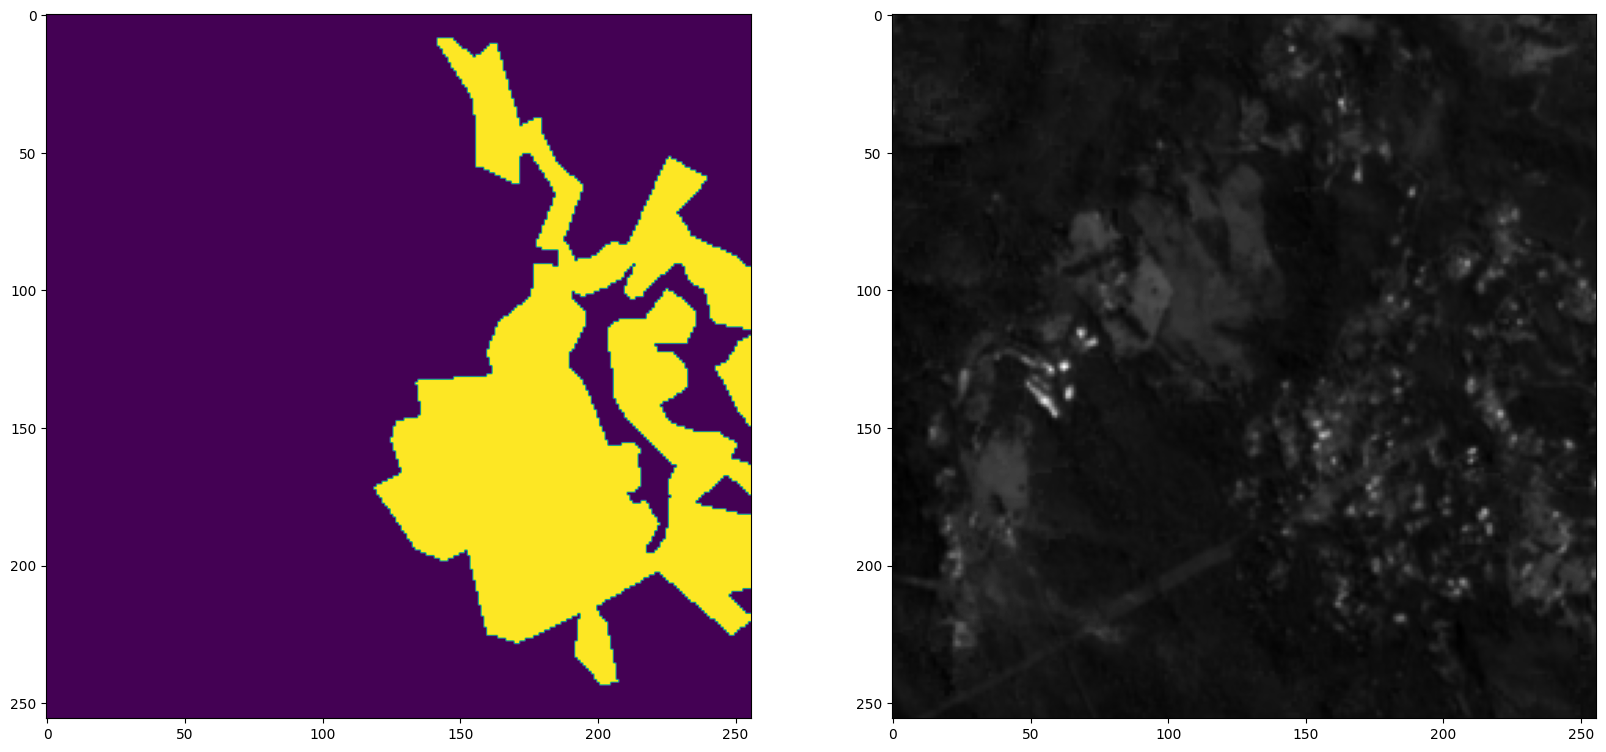

CPU times: user 1.35 s, sys: 10.2 ms, total: 1.36 s
Wall time: 1.23 s


In [ ]:
%%time
import matplotlib.pyplot as plt

i = 0
for img, mask in train_dataset:
    if  (mask != 0).any():
        #subtile_composition.display_images(img)
        plt.figure(figsize=(20,20))
        plt.subplot(1,2,1)
        plt.imshow(mask.squeeze())
        plt.subplot(1,2,2)
        plt.imshow(img[2].squeeze(),cmap='gray')
        plt.show()
        i+=1

    if i == 3:
        pass
        break
    print(i)
    #img,mask = next(train_dataset)

In [ ]:
%%time
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    print(f"Sample {i}: Image shape = {image.shape}, Label shape = {label.shape}")
#4 min, with nan =  false


debugging
nearest
Sample 0: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
debugging
nearest
Sample 1: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
debugging
nearest
Sample 2: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
debugging
nearest
Sample 3: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
debugging
nearest
Sample 4: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
debugging
nearest
Sample 5: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
debugging
nearest
Sample 6: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
debugging
nearest
Sample 7: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
debugging
nearest
Sample 8: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
debugging


### Dataloader

Para carregar várias imagens em batches, usamos dataloaders

In [ ]:
from torch.utils.data import DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, 
                            batch_size=16, 
                            shuffle=True)

In [ ]:
for batch in train_loader:
    img = batch[0]
    mask = batch[1]
    print(img.shape)
    print(mask.shape)
    
    break

debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
torch.Size([16, 12, 256, 256])
torch.Size([16, 1, 256, 256])


### Mostrando 1 batch

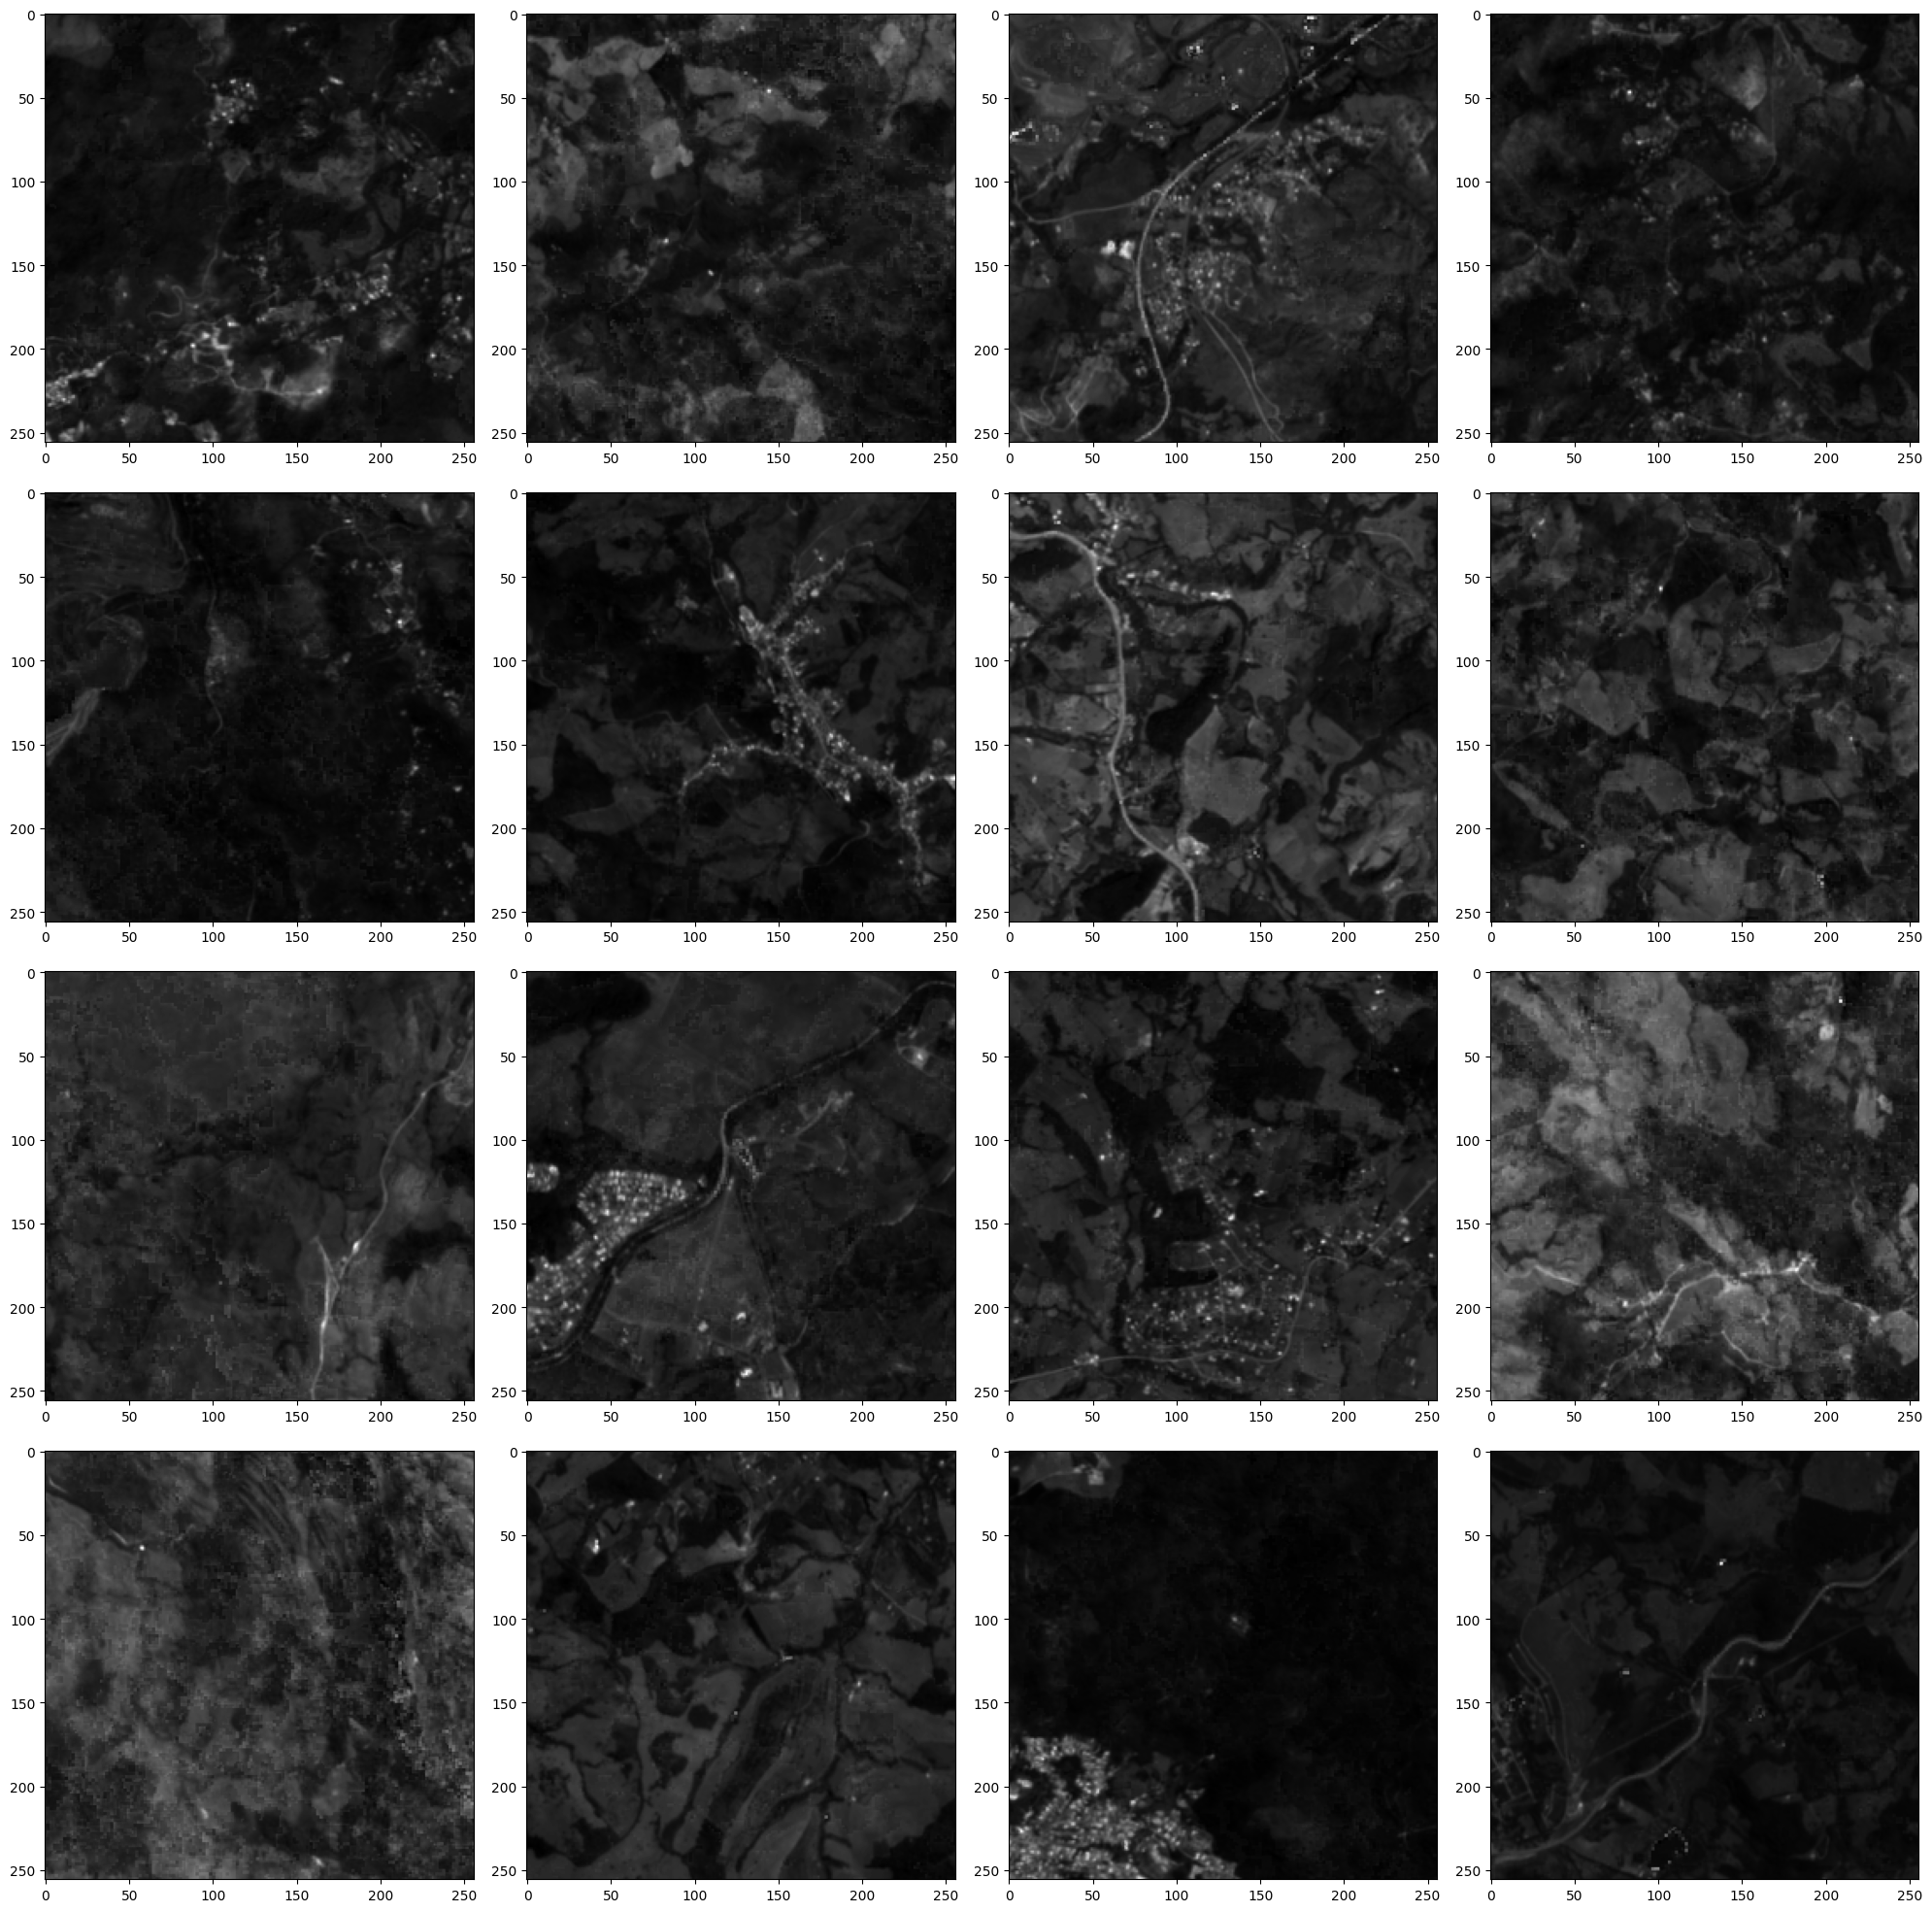

In [ ]:
#subtile_composition.display_images(img)
plt.figure(figsize=(20,20))
for i in range(batch_size):
    plt.subplot(4,4,i+1)
    plt.imshow(img[i,1,:,:].squeeze(),cmap='gray')
    plt.tight_layout()
plt.show()


In [ ]:
for batch in train_loader:
    img = batch[0]
    mask = batch[1]
    unique_classes, counts = torch.unique(mask, return_counts=True)
    print("Class distribution in y_true:")
    for cls, count in zip(unique_classes, counts):
        print(f"Class {cls.item()}: {count.item()} samples")

debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
Class distribution in y_true:
Class 0: 1003477 samples
Class 1: 1699 samples
Class 4: 43400 samples
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
Class distribution in y_true:
Class 0: 980142 samples
Class 1: 4828 samples
Class 2: 777 samples
Class 4: 62829 samples
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugging
nearest
debugg

In [ ]:
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    print(f"Sample {i}: Image shape = {image.shape}, Label shape = {label.shape}")
    
    unique_classes, counts = torch.unique(label, return_counts=True)
    print("Class distribution in y_true:")
    for cls, count in zip(unique_classes, counts):
        print(f"Class {cls.item()}: {count.item()} samples")
    print()

debugging
nearest
Sample 0: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 51578 samples
Class 4: 13958 samples

debugging
nearest
Sample 1: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 51578 samples
Class 4: 13958 samples

debugging
nearest
Sample 2: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 51578 samples
Class 4: 13958 samples

debugging
nearest
Sample 3: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 51578 samples
Class 4: 13958 samples

debugging
nearest
Sample 4: Image shape = torch.Size([12, 256, 256]), Label shape = torch.Size([1, 256, 256])
Class distribution in y_true:
Class 0: 51578 samples
Class 4: 13958 samples

debugging
nearest
Sample 5: Image shape = torch.Size([12, 256, 25

KeyboardInterrupt: 

In [ ]:
import numpy as np
import time
from scipy.interpolate import griddata, RectBivariateSpline
from scipy.ndimage import distance_transform_edt, convolve
import pandas as pd

# Generate a large 2D array with NaNs
np.random.seed(42)
arr = np.random.rand(1000, 1000).astype(np.float32)
arr[np.random.rand(*arr.shape) < 0.2] = np.nan  # Introduce 20% NaNs

# Method 1: scipy.interpolate.griddata
def method_griddata(arr):
    mask = ~np.isnan(arr)
    x, y = np.indices(arr.shape)
    valid_x = x[mask]
    valid_y = y[mask]
    valid_values = arr[mask]
    nan_x = x[~mask]
    nan_y = y[~mask]
    arr[~mask] = griddata((valid_x, valid_y), valid_values, (nan_x, nan_y), method='linear')
    return arr

# Method 2: scipy.ndimage.distance_transform_edt (Nearest Neighbor)
def method_nearest(arr):
    mask = np.isnan(arr)
    indices = distance_transform_edt(mask, return_distances=False, return_indices=True)
    return arr[tuple(indices)]

# Method 3: scipy.interpolate.RectBivariateSpline (Corrected)
def method_spline(arr):
    valid_mask = ~np.isnan(arr)
    x, y = np.indices(arr.shape)
    x_unique = np.unique(x[0, :])
    y_unique = np.unique(y[:, 0])
    interp_func = RectBivariateSpline(x_unique, y_unique, arr, kx=1, ky=1)
    arr[np.isnan(arr)] = interp_func(x[np.isnan(arr)], y[np.isnan(arr)], grid=False)
    return arr

# Method 4: Convolution with a kernel
def method_convolution(arr):
    mask = np.isnan(arr)
    kernel = np.array([[0, 1, 0],
                       [1, 0, 1],
                       [0, 1, 0]], dtype=np.float32)
    kernel /= np.sum(kernel)
    filled_arr = arr.copy()
    filled_arr[mask] = 0
    filled_arr = convolve(filled_arr, kernel, mode='constant', cval=0.0)
    filled_arr[mask] = filled_arr[mask] / convolve(~mask, kernel, mode='constant', cval=0.0)[mask]
    return filled_arr

# Method 5: pandas.DataFrame.interpolate
def method_pandas(arr):
    df = pd.DataFrame(arr)
    filled_df = df.interpolate(method='linear', axis=0).interpolate(method='linear', axis=1)
    return filled_df.to_numpy()

# Benchmark function
def benchmark(method, arr, method_name):
    start_time = time.time()
    result = method(arr.copy())  # Use a copy to avoid modifying the original array
    elapsed_time = time.time() - start_time
    print(f"{method_name}: {elapsed_time:.4f} seconds")
    return result

# Run benchmarks
print("Benchmarking interpolation methods...")
benchmark(method_griddata, arr, "griddata")
benchmark(method_nearest, arr, "nearest")
#benchmark(method_spline, arr, "spline")
benchmark(method_convolution, arr, "convolution")
benchmark(method_pandas, arr, "pandas")

Benchmarking interpolation methods...
griddata: 12.5650 seconds
nearest: 0.0410 seconds
convolution: 0.0238 seconds
pandas: 0.0949 seconds


/tmp/ipykernel_216530/1063582880.py:50: RuntimeWarning: divide by zero encountered in divide
  filled_arr[mask] = filled_arr[mask] / convolve(~mask, kernel, mode='constant', cval=0.0)[mask]
/tmp/ipykernel_216530/1063582880.py:50: RuntimeWarning: invalid value encountered in divide
  filled_arr[mask] = filled_arr[mask] / convolve(~mask, kernel, mode='constant', cval=0.0)[mask]


array([[0.37454012, 0.9507143 , 0.7746864 , ..., 0.13681863, 0.2914122 ,
        0.44600576],
       [0.18513294, 0.54190093, 0.87294585, ..., 0.22330326, 0.05705472,
        0.28218707],
       [0.2617057 , 0.2469788 , 0.9062546 , ..., 0.30978787, 0.29004553,
        0.3500511 ],
       ...,
       [0.08526213, 0.09203751, 0.69438213, ..., 0.93032575, 0.91330034,
        0.17538922],
       [0.09977664, 0.9638265 , 0.7600546 , ..., 0.33470458, 0.6709858 ,
        0.5524189 ],
       [0.11429115, 0.15980354, 0.8257271 , ..., 0.418072  , 0.42867127,
        0.92944854]], dtype=float32)